# Dummy variable trap
## You should not include two dummy variables to code gender or in this case the State. If you include two dummy variable for coding a yes or no question and you also use the constant you are adding the same independent variables (B constant is always 1 and two dummy variable summed will always be 1 as well). Solution is either to take out the constant or one of the two dummy variable.

# All in method

## A priori model 
## Inserting variables based on hypothesis testing

# Backward elimination $\rightarrow$ Stepwise Regression
## - Needs a significance level to STAY in the model 
## - Fit model with all predictors
## - Consider predictor with highest p value otherwise remove the predictor
## - Fit again and repeat

# Forward selection $\rightarrow$ Stepwise Regression
## - Needs a significance level to ENTER in the model 
## - Fit all the variables to the model. Select lowest pValue
## - Keep this variable and fit all possible models with one extra predictor added to the one you have already
## - Consider the predictor with the lowest pValue. If P < SL go back to previous step and finish when the condition is not met
## - Remember to keep the previous model


# Bideractional elimination $\rightarrow$ Stepwise Regression
## 1. Needs a significance level to enter AND to stay in the model 
## 2. Perform forward selection step (p<enterValue)
## 3. Perform all backward elimination step (p<stayValue)
## 4. Repeat from step 2 until no new variable can enter or no old variable can leave

# All possible models
## Select criterion of goodness of fit (Akaike)
## Construct all possible regression models: $2^N - 1$ total combination
## Select the one with the best criterion 

# Example with Backward Elimination

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm

In [2]:

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X = ct.fit_transform(X)

print(X[0:10,:])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]]


In [4]:
# We are not doing the multiple regression assumption because if the model is not correct it will just perform poorly

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Training the model
## Dummy variable is handled by the class used for fitting the model
## Selecting variables will be dealt by the fitting model

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
modelFit = regressor.fit(X_train,y_train)
print(modelFit.score(X_train,y_train))
print(modelFit.coef_)
print(modelFit.rank_)

# Extracting coefficients p values using statmodels
import statsmodels.api as sm
#X_2 = sm.add_constant(X_train)

y_trainD = np.array(y_train,dtype=float)
X_trainD = np.array(X_train,dtype=float)

mod = sm.OLS(y_trainD,X_trainD)

estimate = mod.fit()
print(estimate.summary())

0.9501847627493607
[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           3.91e-21
Time:                        19:31:36   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

# Calculate manually the pValues

In [21]:
from scipy import stats

params = np.append(modelFit.intercept_,modelFit.coef_)
predictions = modelFit.predict(X_trainD)

newX = pd.DataFrame({"Constant":np.ones(len(X_trainD))}).join(pd.DataFrame(X_trainD))
MSE = (sum((y_trainD-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0    42467.5292     4.646477e+11     0.000            NaN
1       86.6384     4.646477e+11     0.000            NaN
2     -872.6458     4.646477e+11    -0.000            NaN
3      786.0074     4.646477e+11     0.000            NaN
4        0.7735     5.600000e-02    13.817            NaN
5        0.0329     6.700000e-02     0.487            NaN
6        0.0366     2.000000e-02     1.857            NaN


# Predicting the test set

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


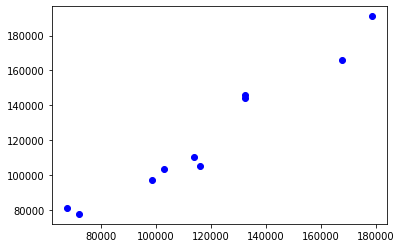

In [ ]:
y_pred = modelFit.predict(X_test)
np.set_printoptions(precision=2)
concatenate = np.concatenate( (y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(concatenate)
plt.scatter(y_pred,y_test,color='blue')